In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3

In [ ]:
! unzip cats_and_dogs.zip

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/train/
   creating: cats_and_dogs/train/cats/
  inflating: cats_and_dogs/train/cats/cat.0.jpg  
  inflating: cats_and_dogs/train/cats/cat.1.jpg  
  inflating: cats_and_dogs/train/cats/cat.10.jpg  
  inflating: cats_and_dogs/train/cats/cat.100.jpg  
  inflating: cats_and_dogs/train/cats/cat.101.jpg  
  inflating: cats_and_dogs/train/cats/cat.102.jpg  
  inflating: cats_and_dogs/train/cats/cat.103.jpg  
  inflating: cats_and_dogs/train/cats/cat.104.jpg  
  inflating: cats_and_dogs/train/cats/cat.105.jpg  
  inflating: cats_and_dogs/train/cats/cat.106.jpg  
  inflating: cats_and_dogs/train/cats/cat.107.jpg  
  inflating: cats_and_dogs/train/cats/cat.108.jpg  
  inflating: cats_and_dogs/train/cats/cat.109.jpg  
  inflating: cats_and_dogs/train/cats/cat.11.jpg  
  inflating: cats_and_dogs/train/cats/cat.110.jpg  
  inflating: cats_and_dogs/train/cats/cat.111.jpg  
  inflating: cats_and_dogs/train/cats/cat.112

## Inception V3

In [ ]:
base_model = InceptionV3(weights='imagenet',include_top='False',input_shape=(299,299,3))

base_model.trainable = False

In [ ]:
# Adding the top layer

x = base_model.output
x = Flatten()(x)

x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(1,activation='sigmoid')(x)

model= Model(inputs=base_model.input,outputs=predictions)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
validation_datagen = ImageDataGenerator(
        rescale=1./255)

In [ ]:
train_gen1 = train_datagen.flow_from_directory('/content/cats_and_dogs/train',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'binary')


validation_gen1 = validation_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model_history= model.fit(train_gen1,epochs=10,validation_data=validation_gen1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 476ms/step - accuracy: 0.9154 - loss: 0.5856 - val_accuracy: 0.9780 - val_loss: 0.2152
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.9848 - loss: 0.1460 - val_accuracy: 0.9830 - val_loss: 0.0725
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.9894 - loss: 0.0590 - val_accuracy: 0.9810 - val_loss: 0.0534
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9820 - val_loss: 0.0490
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.9904 - loss: 0.0329 - val_accuracy: 0.9820 - val_loss: 0.0481
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.9940 - loss: 0.0267 - val_accuracy: 0.9800 - val_loss: 0.0500
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9820 - val_loss: 0.0505
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.9957 - loss: 0.0188 - val_accuracy: 0.981

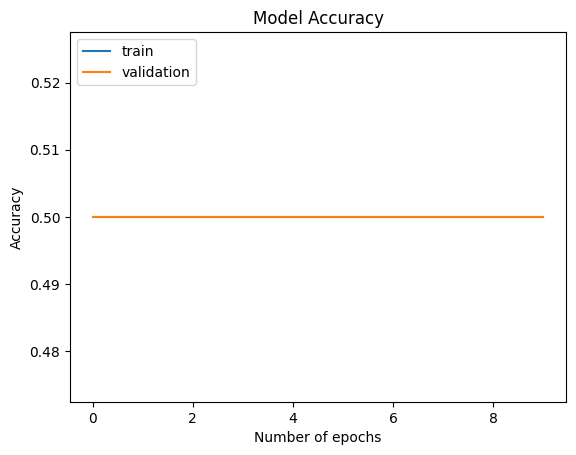

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

## Evaluation matrix

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


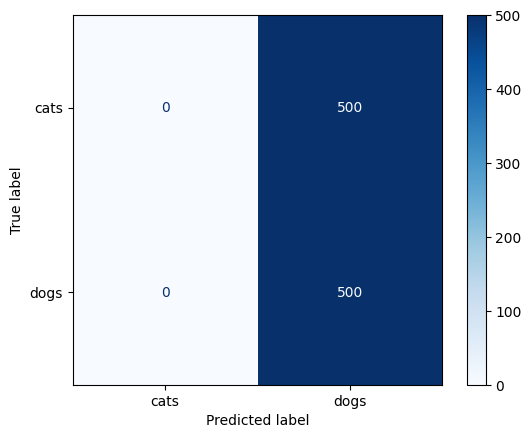

In [ ]:
def evaluate_model(model, generator):
  y_true = []
  y_pred = []

  for i in range(len(generator)):
    x_batch, y_batch = next(generator) # getting data in batch
    y_true.extend(y_batch) # true labels
    preds = model.predict(x_batch) # probabilities

    y_pred.extend(preds.flatten()) # flatten and collecting predictions

  y_pred_binary = [1 if pred >0.5 else 0 for pred in y_pred]
  # confusion matrix
  cm = confusion_matrix(y_true, y_pred_binary)
  print("Confusion matrix :", cm)
  # classification report
  class_labels = list(generator.class_indices.keys()) # [cats, dogs]
  cr = classification_report(y_true, y_pred_binary, target_names = class_labels, labels = [0,1])
  print("Classification report :", cr)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_labels)
  disp.plot(cmap = plt.cm.Blues)
  plt.show()

validation_gen1 = validation_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False) # preserve the sequence
evaluate_model(model, validation_gen1)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


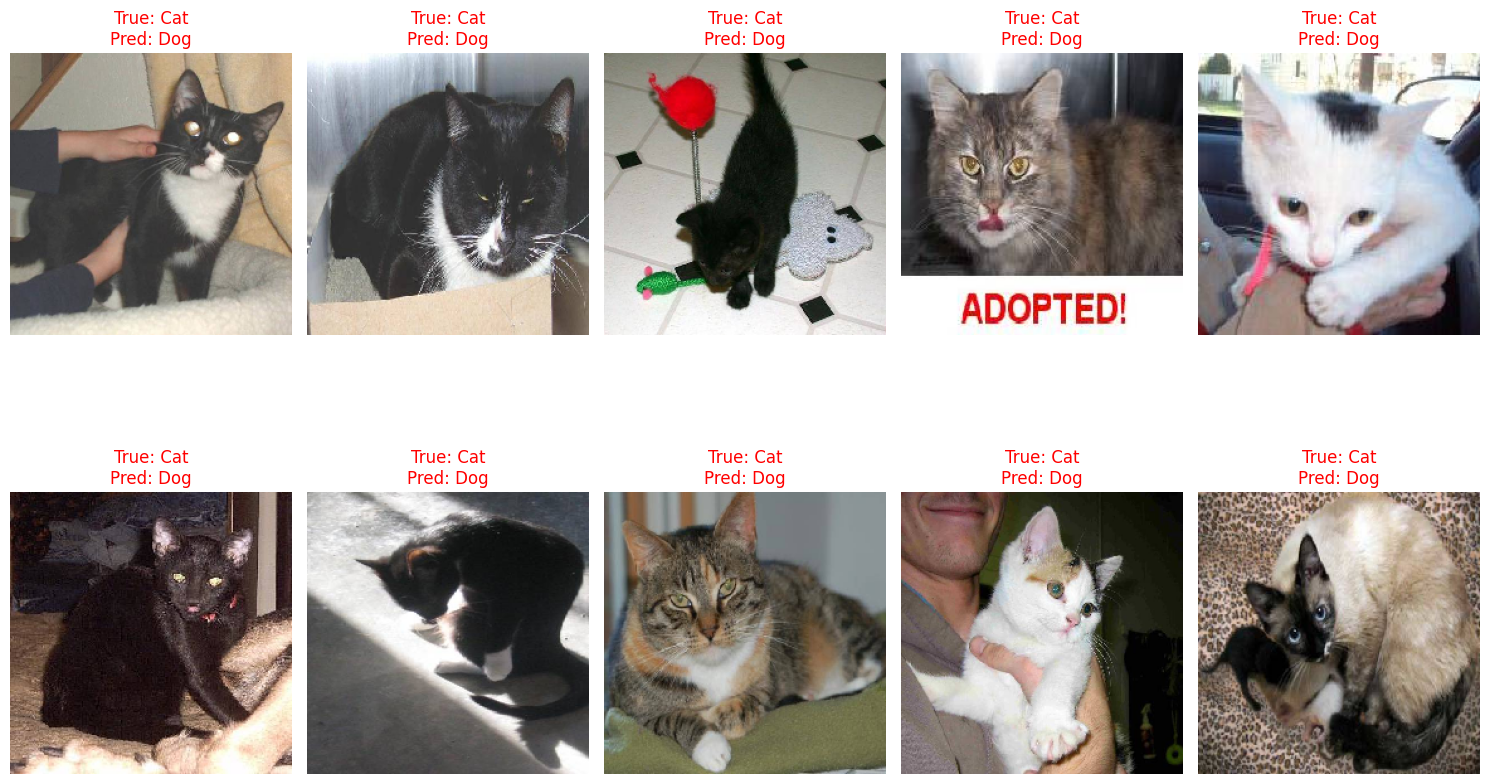

In [ ]:
def visualize_predictions(generator, model , num_images = 10):
  x_batch, y_batch = next(generator)
  predictions = model.predict(x_batch)

  y_pred_binary = [1 if pred >0.5 else 0 for pred in predictions]

  plt.figure(figsize = (15, 10))

  for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_batch[i])

    true_label = 'Dog' if y_batch[i] == 1 else 'Cat'
    pred_label = 'Dog' if y_pred_binary[i] == 1 else 'Cat'

    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color = color)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

validation_gen1 = validation_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False) # preserve the sequence

visualize_predictions(validation_gen1, model, num_images=10)
